In [22]:

import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

# Loading audio files
출처 : https://www.youtube.com/watch?v=rlypsap6Wow&t=4s

In [23]:
file1 = '../../nmb_data/teamvoice/testvoice_F2.wav'
file2 = '../../nmb_data/teamvoice/testvoice_F1.wav'
file3 = '../../nmb_data/teamvoice/testvoice_M2.wav' 

In [24]:
# load audio files with librosa
debussy, sr = librosa.load(file1)
redhot, _ = librosa.load(file2)
duke, _ = librosa.load(file3)

# Basic information regarding audio files

In [25]:
print(debussy.shape)
print(redhot.shape)

(110250,)
(110250,)


In [26]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print(f"One sample lasts for {sample_duration:6f} seconds")

One sample lasts for 0.000045 seconds


In [27]:
# total number of samples in audio file
tot_samples = len(debussy)
tot_samples

110250

In [28]:
# duration of debussy audio in seconds
duration = 1 / sr * tot_samples
print(f"The audio lasts for {duration} seconds")

The audio lasts for 5.0 seconds


---------------------

# Visualising audio signal in the time domain

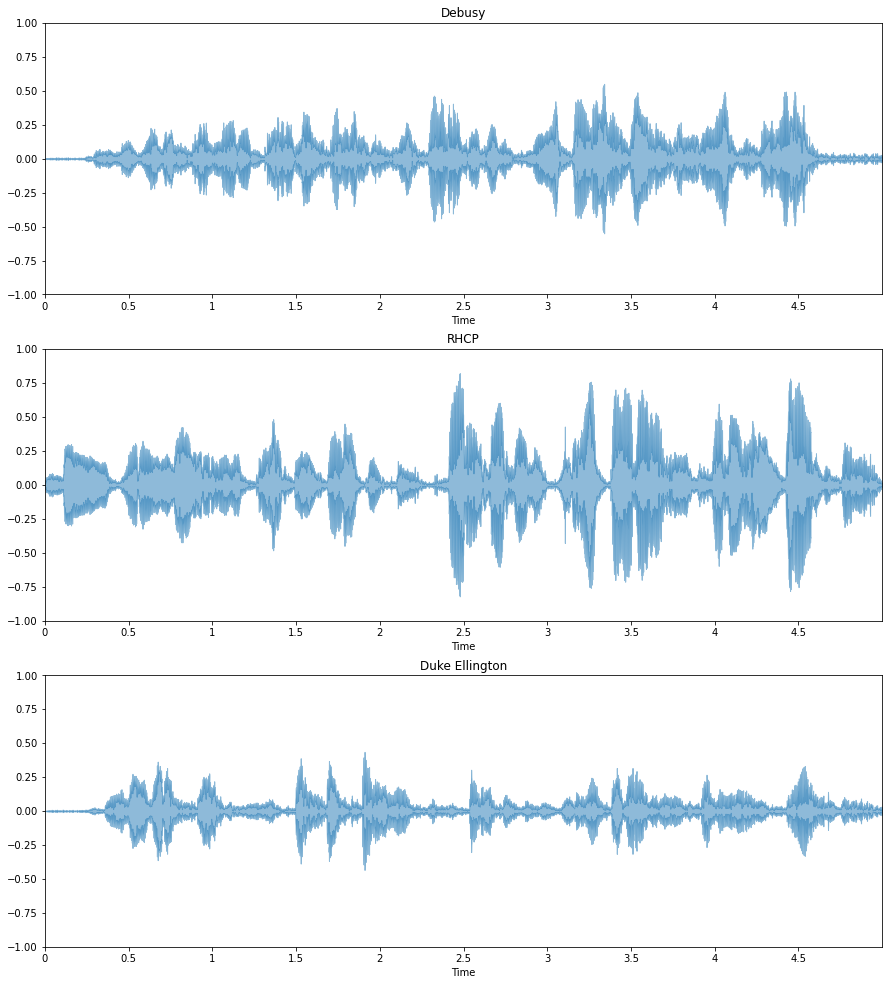

In [29]:
# vicualize waveforms

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

-------------

# Calculating amplitude envelope

In [30]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

# 첫 번째 방법 (simple)
def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [31]:
# number of frames in amplitude envelope
ae_debussy = amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
print(len(ae_debussy)) 
# # of frames

216


In [32]:
# 두 번째 방법 (difficult)
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [33]:
fancy_ae_debussy = fancy_amplitude_envelope(debussy, FRAME_SIZE, HOP_LENGTH)
print(len(fancy_ae_debussy))

216


In [34]:
(ae_debussy == fancy_ae_debussy).all()
# 모든 값이 같다. (같은 알고리즘이다.)

True

In [35]:
# calculate amplitude envelope for RHCP and Duke Ellington
ae_redhot = amplitude_envelope(redhot, FRAME_SIZE, HOP_LENGTH)
ae_duke = amplitude_envelope(duke, FRAME_SIZE, HOP_LENGTH)

#  Visualising amplitude envelope

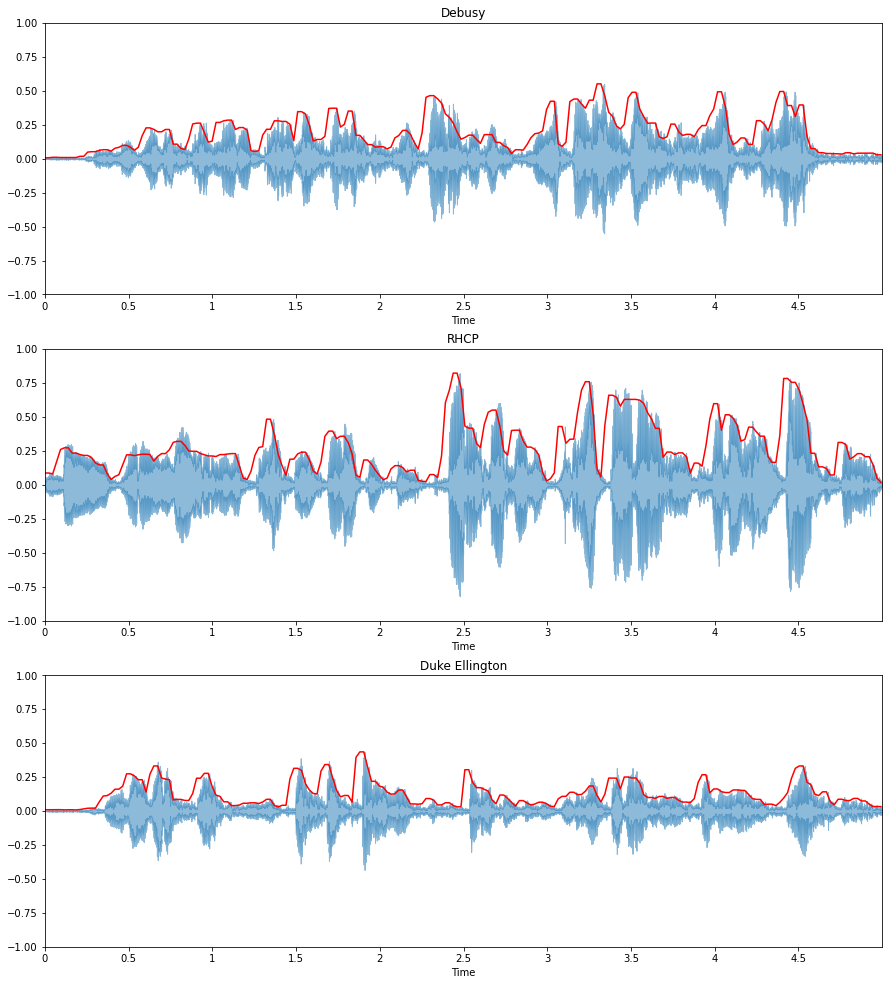

In [39]:
frames = range(len(ae_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# amplitude envelope is graphed in red

plt.figure(figsize=(15, 17))

ax = plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy, alpha=0.5)
plt.plot(t, ae_debussy, color="r")
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot, alpha=0.5)
plt.plot(t, ae_redhot, color="r")
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke, alpha=0.5)
plt.plot(t, ae_duke, color="r")
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()